In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Exploration

In [25]:
data = pd.read_csv(r"C:\Users\Khanya\Downloads\Task 1 YouTube Streamer Analysis-20240809T125025Z-001\Task 1 YouTube Streamer Analysis\youtubers_df.csv")

# Check the structure
data.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [21]:
# Check for missing data
data.isnull().sum()  #Check missing values

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [47]:
data["Categories"].unique()

array(['Música y baile', 'Videojuegos, Humor', 'Educación', nan,
       'Animación, Juguetes', 'Películas, Videojuegos', 'Juguetes',
       'Videojuegos', 'Películas, Animación', 'Películas',
       'Noticias y Política', 'Animación, Humor',
       'Música y baile, Animación', 'Música y baile, Películas',
       'Películas, Juguetes', 'Películas, Humor', 'Vlogs diarios',
       'Videojuegos, Juguetes', 'Animación, Videojuegos', 'Animación',
       'Música y baile, Humor', 'Diseño/arte, DIY y Life Hacks',
       'Ciencia y tecnología', 'Fitness, Salud y autoayuda',
       'Belleza, Moda', 'Humor', 'Comida y bebida', 'Deportes', 'Fitness',
       'Viajes, Espectáculos', 'Comida y bebida, Salud y autoayuda',
       'Diseño/arte', 'DIY y Life Hacks, Juguetes', 'Educación, Juguetes',
       'Juguetes, Coches y vehículos', 'Música y baile, Juguetes',
       'Animales y mascotas', 'ASMR', 'Moda', 'DIY y Life Hacks',
       'Diseño/arte, Belleza', 'Coches y vehículos',
       'Animación, Humor

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [27]:
#Handle missing data
data.fillna("unknown", inplace=True)

#Checking output
data.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

In [154]:
#Correcting the column name Suscribers to Subscribers
data.rename(columns={"Suscribers": "Subscribers"},inplace=True)
#Checking the columns of DataFrame
data.columns

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [156]:
data.duplicated().sum()

0

# Observations from the YouTubers Dataset

In [55]:
#First 10 rows of the data
data.head(10)

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,unknown,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


In [57]:
#display summary statistics for numeric columns
data.describe()

,Rank,Subscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [59]:
#display summary statistics for object (string) columns
data.describe(include= ["O"]) 

,Username,Categories,Country,Links
count,1000,1000,1000,1000
unique,994,46,29,994
top,NickyJamTV,unknown,Estados Unidos,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
freq,2,306,293,2


# 2. Trend Analysis

In [31]:
# Popular Categories
category_counts = data["Categories"].value_counts()
category_counts

Categories
unknown                               306
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor  

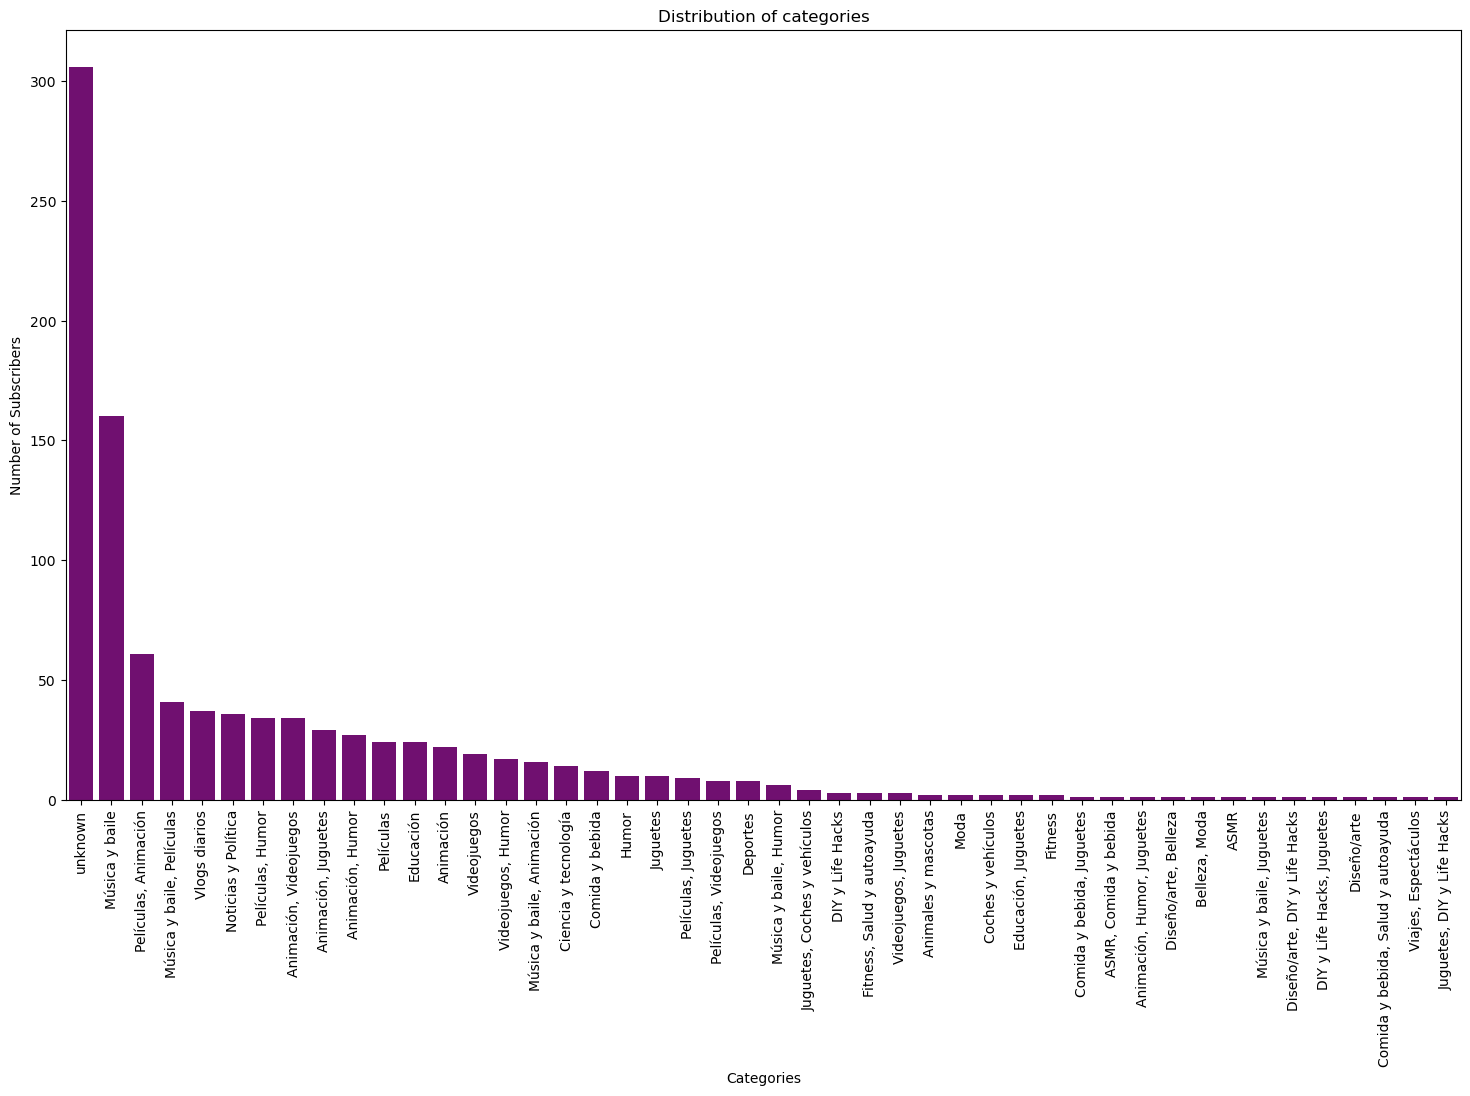

In [33]:
# Graphical representation of the categories
plt.figure(figsize = (18,10))
sns.barplot(x=category_counts.index,y = category_counts.values, color = "purple")
plt.title("Distribution of categories")
plt.xlabel("Categories")
plt.ylabel("Number of Subscribers")
plt.xticks(rotation = 90)
plt.show()

<Axes: >

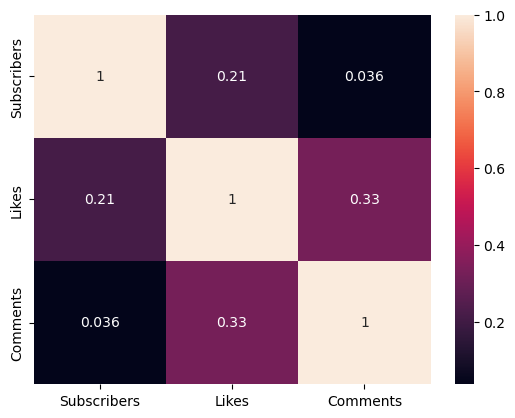

In [76]:
data_sub = data.drop(columns=["Rank", "Visits"])

# Select only numeric columns for correlation analysis
numeric_data_sub = data_sub.select_dtypes(include=['number'])

# Correlation Analysis
sns.heatmap(numeric_data_sub.corr(), annot=True)

# 3. Audience Study

In [79]:
# Country
country_counts = data["Country"].value_counts()
country_counts

Country
Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Indonesia          38
Rusia              25
Tailandia          18
Colombia           16
Filipinas          13
Pakistán           11
Argentina           7
Egipto              5
Francia             4
Turquía             4
Arabia Saudita      4
España              4
Iraq                4
Japón               3
Bangladesh          3
Reino Unido         3
Marruecos           2
Argelia             2
Perú                2
Singapur            1
Ecuador             1
Jordania            1
El Salvador         1
Somalia             1
Name: count, dtype: int64

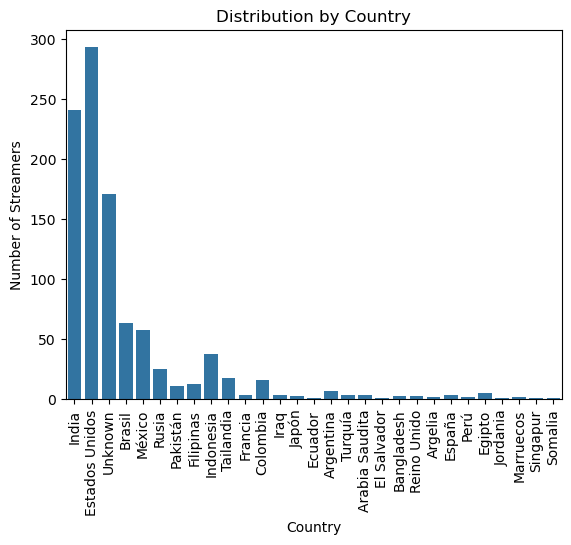

In [81]:
# Geographical Distribution
sns.countplot(x="Country", data=data)
plt.title("Distribution by Country")
plt.ylabel("Number of Streamers")
plt.xticks(rotation = 90)
plt.show()

In [85]:
category_counts = data.groupby(["Country", "Categories"])["Username"].count().unstack().fillna(0)
category_counts

Categories,ASMR,"ASMR, Comida y bebida",Animación,"Animación, Humor","Animación, Humor, Juguetes","Animación, Juguetes","Animación, Videojuegos",Animales y mascotas,"Belleza, Moda",Ciencia y tecnología,...,"Películas, Animación","Películas, Humor","Películas, Juguetes","Películas, Videojuegos","Viajes, Espectáculos",Videojuegos,"Videojuegos, Humor","Videojuegos, Juguetes",Vlogs diarios,unknown
Country,,,,,,,,,,,,,,,,,,,,,
Arabia Saudita,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Argelia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Argentina,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Bangladesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Brasil,0.0,0.0,3.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,...,12.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,13.0
Colombia,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
Ecuador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Egipto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
El Salvador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


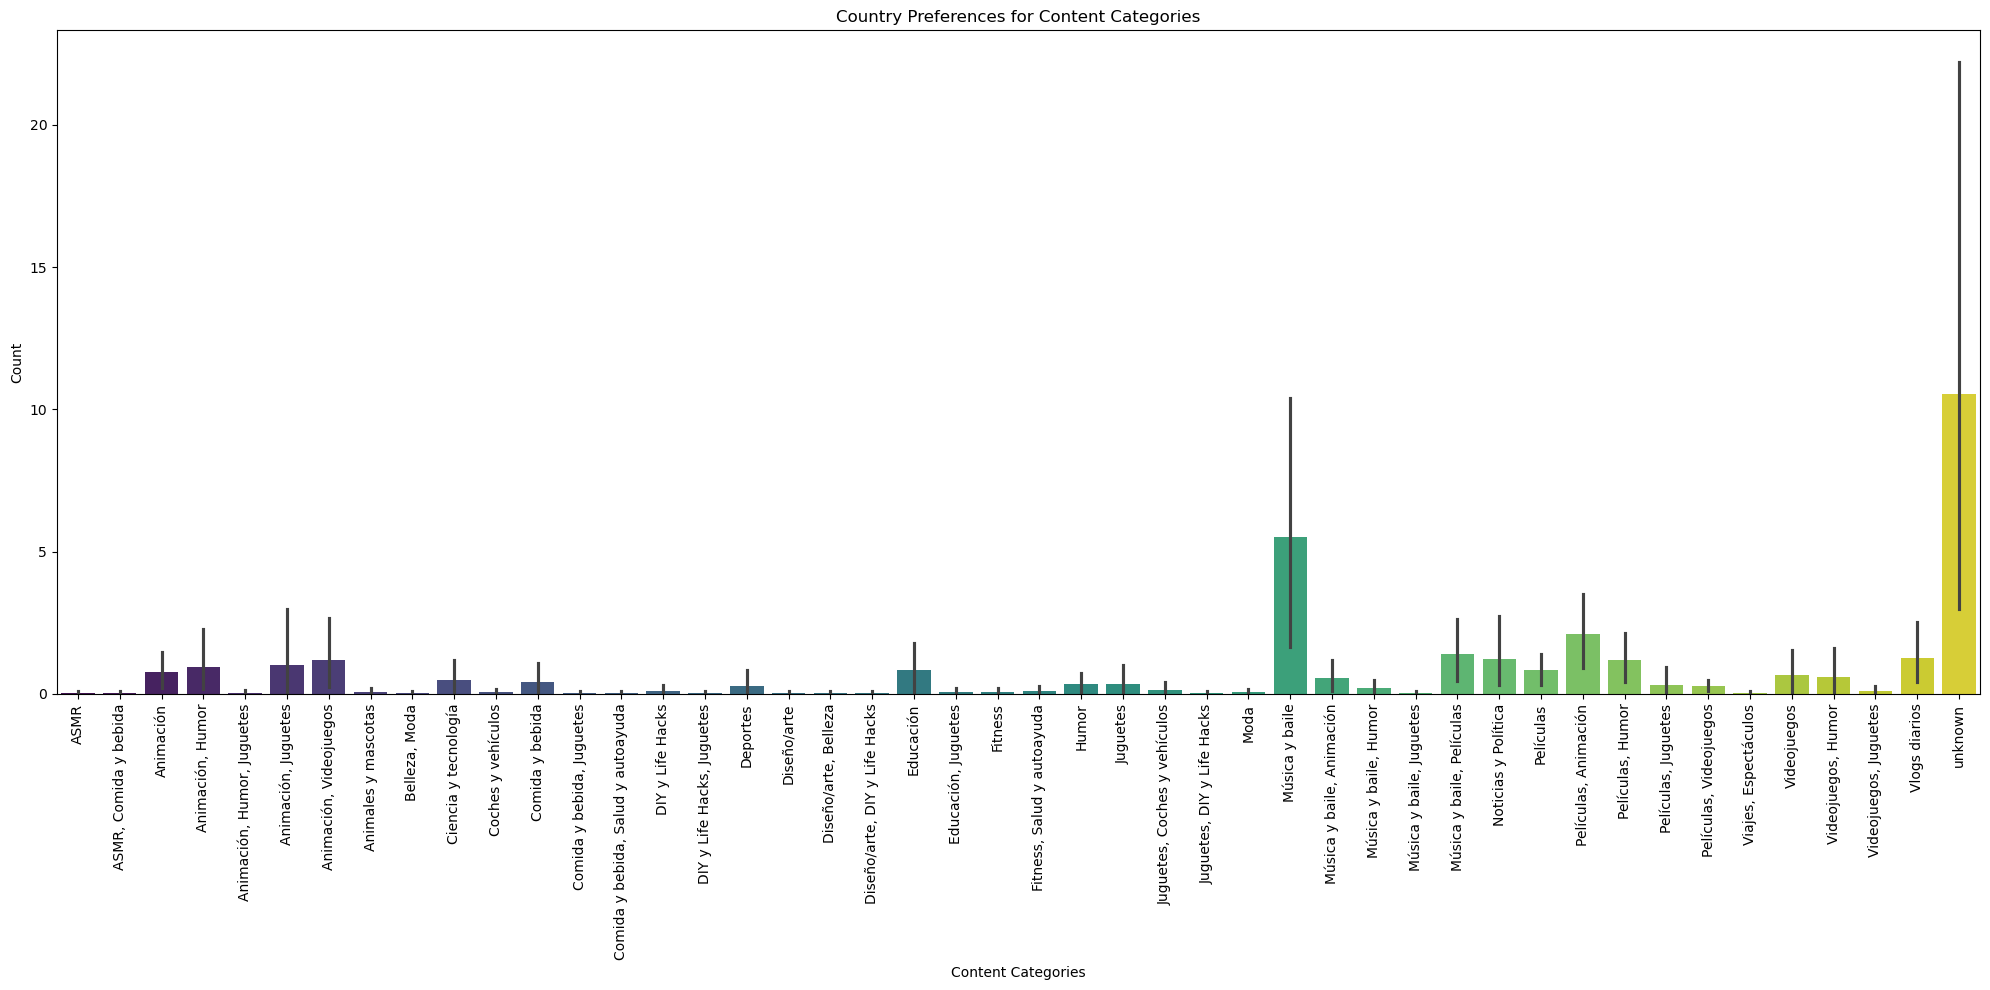

In [87]:
# Show the above table in a graph
plt.figure(figsize=(20,10))
sns.barplot(data=category_counts, palette='viridis')
plt.title('Country Preferences for Content Categories')
plt.xlabel('Content Categories')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

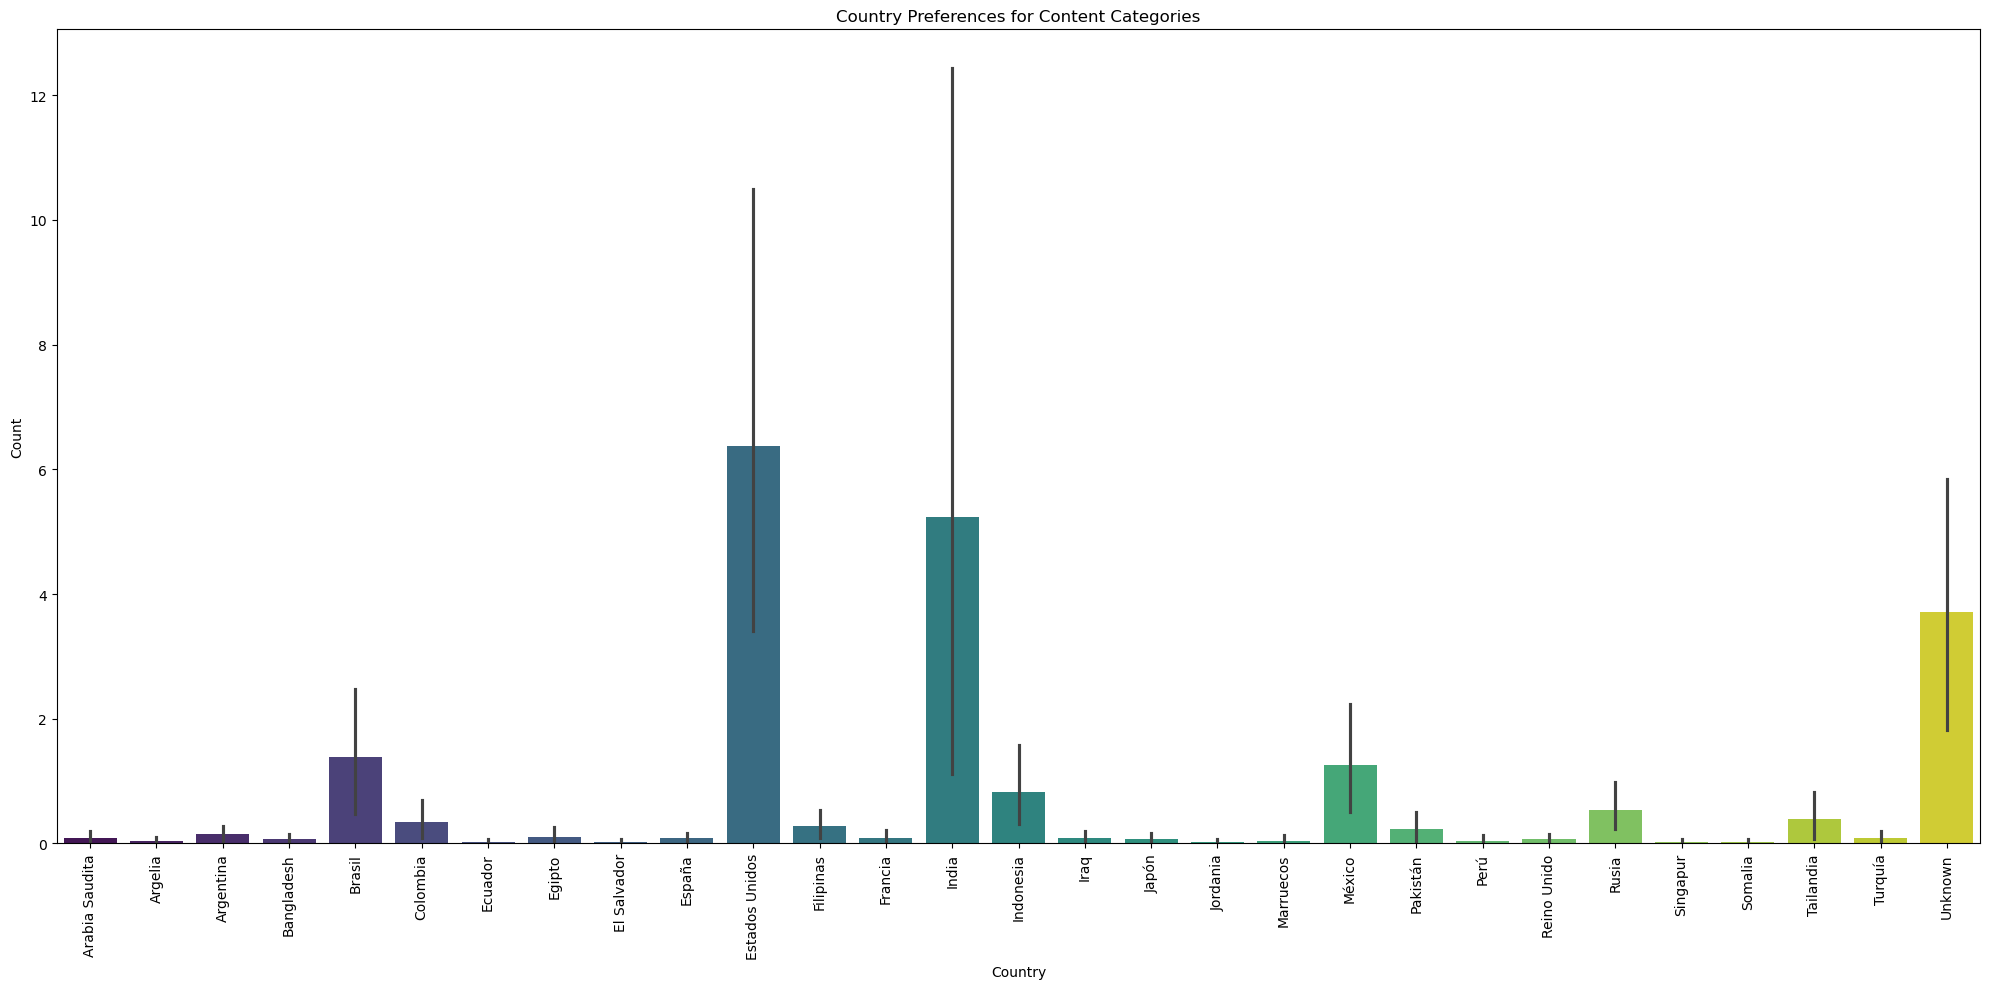

In [89]:
# Reshaping the DataFrame for plotting
category_counts = category_counts.transpose() # Transpose for better visualization

plt.figure(figsize=(20,10))
sns.barplot(data=category_counts, palette='viridis')
plt.title('Country Preferences for Content Categories')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


# 4. Performance Metrics

The average number of Subscribers is:  21894400.0
The average number of Visits is:  1209446.3155
The average number of Likes is:  53632.592
The average number of Comments is:  1288.768


Text(0.5, 0, 'Metrics')

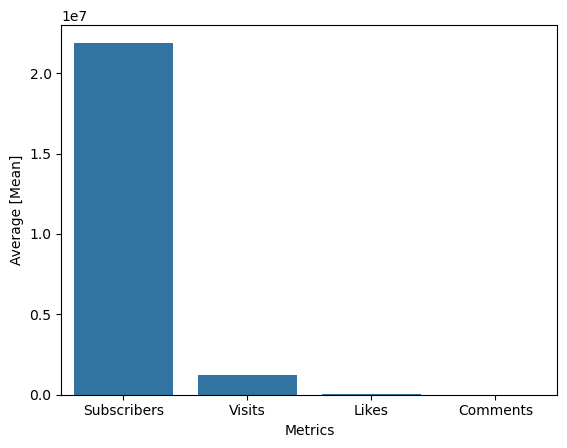

In [94]:
# Average Metrics Calculation
avg_subscribers = data["Subscribers"].mean()
avg_visits = data["Visits"].mean()
avg_likes = data["Likes"].mean()
avg_comments = data["Comments"].mean()

# Output
print("The average number of Subscribers is: ",avg_subscribers)
print("The average number of Visits is: ",avg_visits)
print("The average number of Likes is: ",avg_likes)
print("The average number of Comments is: ",avg_comments)

# Visualization
sns.barplot(x=["Subscribers", "Visits", "Likes", "Comments"], y=[avg_subscribers, avg_visits, avg_likes, avg_comments])
plt.ylabel("Average [Mean]")
plt.xlabel("Metrics")

# 5. Content Categories

Categories
unknown                               306
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor  

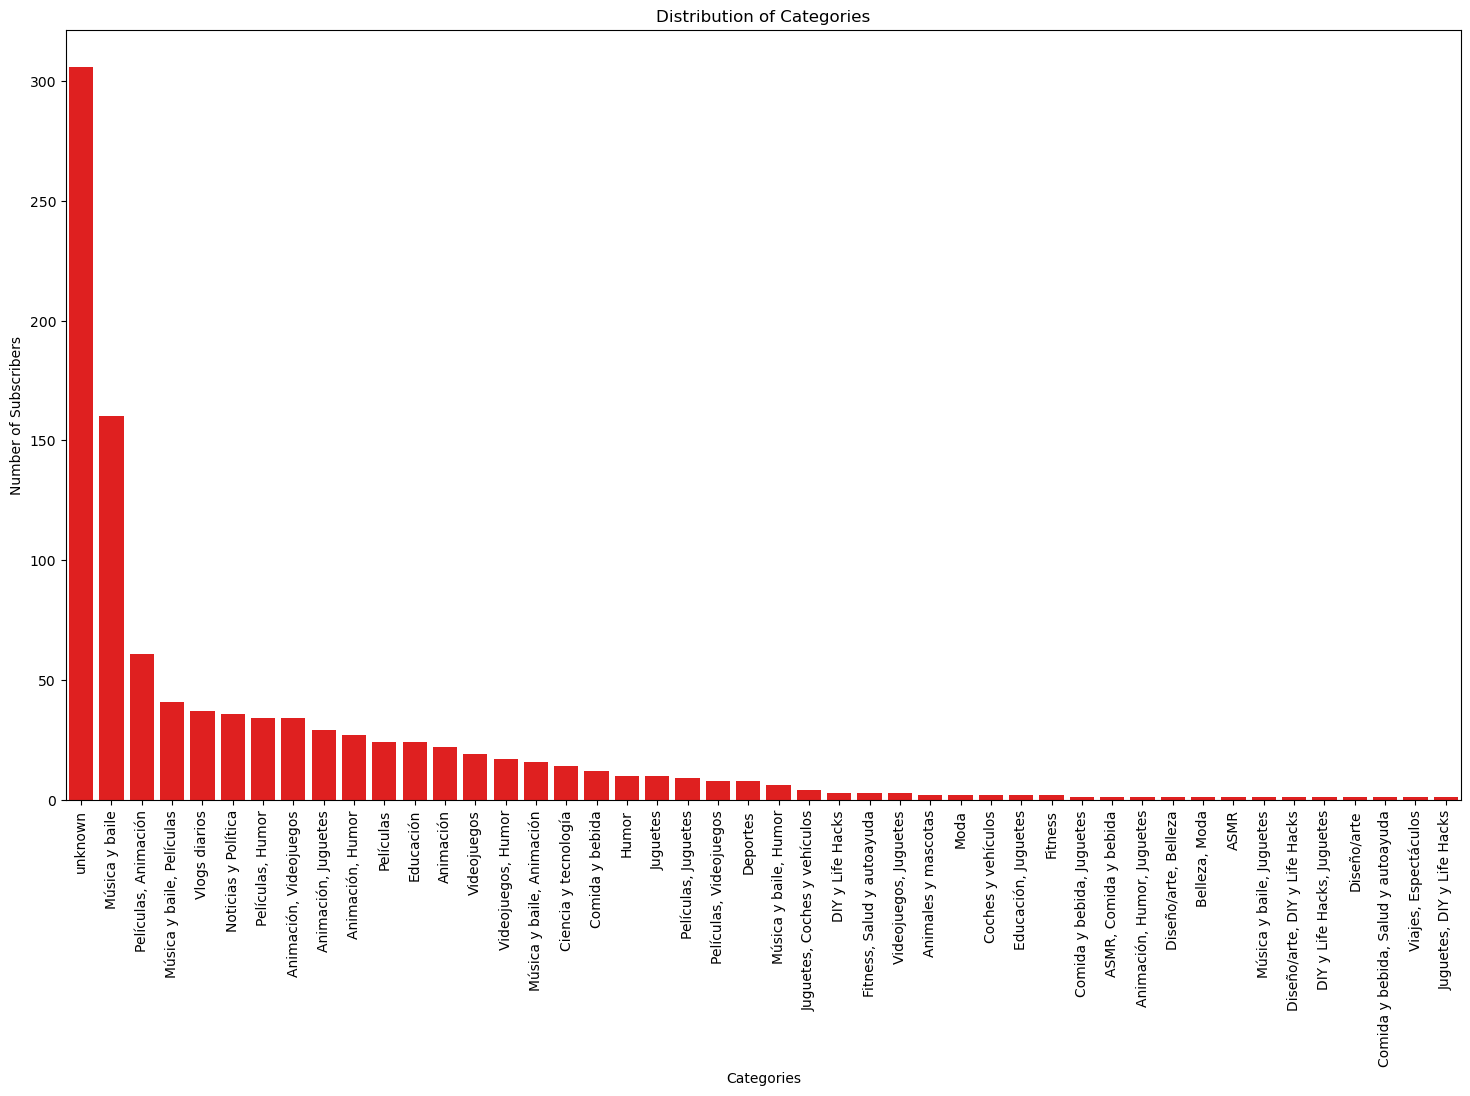

In [109]:
# Value count of the content categories
category_counts = data["Categories"].value_counts()
print(category_counts)
# Visualization of the value count of the content categories
plt.figure(figsize = (18,10))
sns.barplot(x=category_counts.index,y = category_counts.values, color = "red")
plt.title("Distribution of Categories")
plt.xlabel("Categories")
plt.ylabel("Number of Subscribers")
plt.xticks(rotation = 90)
plt.show()

In [111]:
category_count = data["Categories"].value_counts()
categories_with_streamers_above_30 = category_count[category_count > 30]
print("Categories with streamers above 30")
print(categories_with_streamers_above_30)

Categories with streamers above 30
Categories
unknown                      306
Música y baile               160
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Películas, Humor              34
Animación, Videojuegos        34
Name: count, dtype: int64


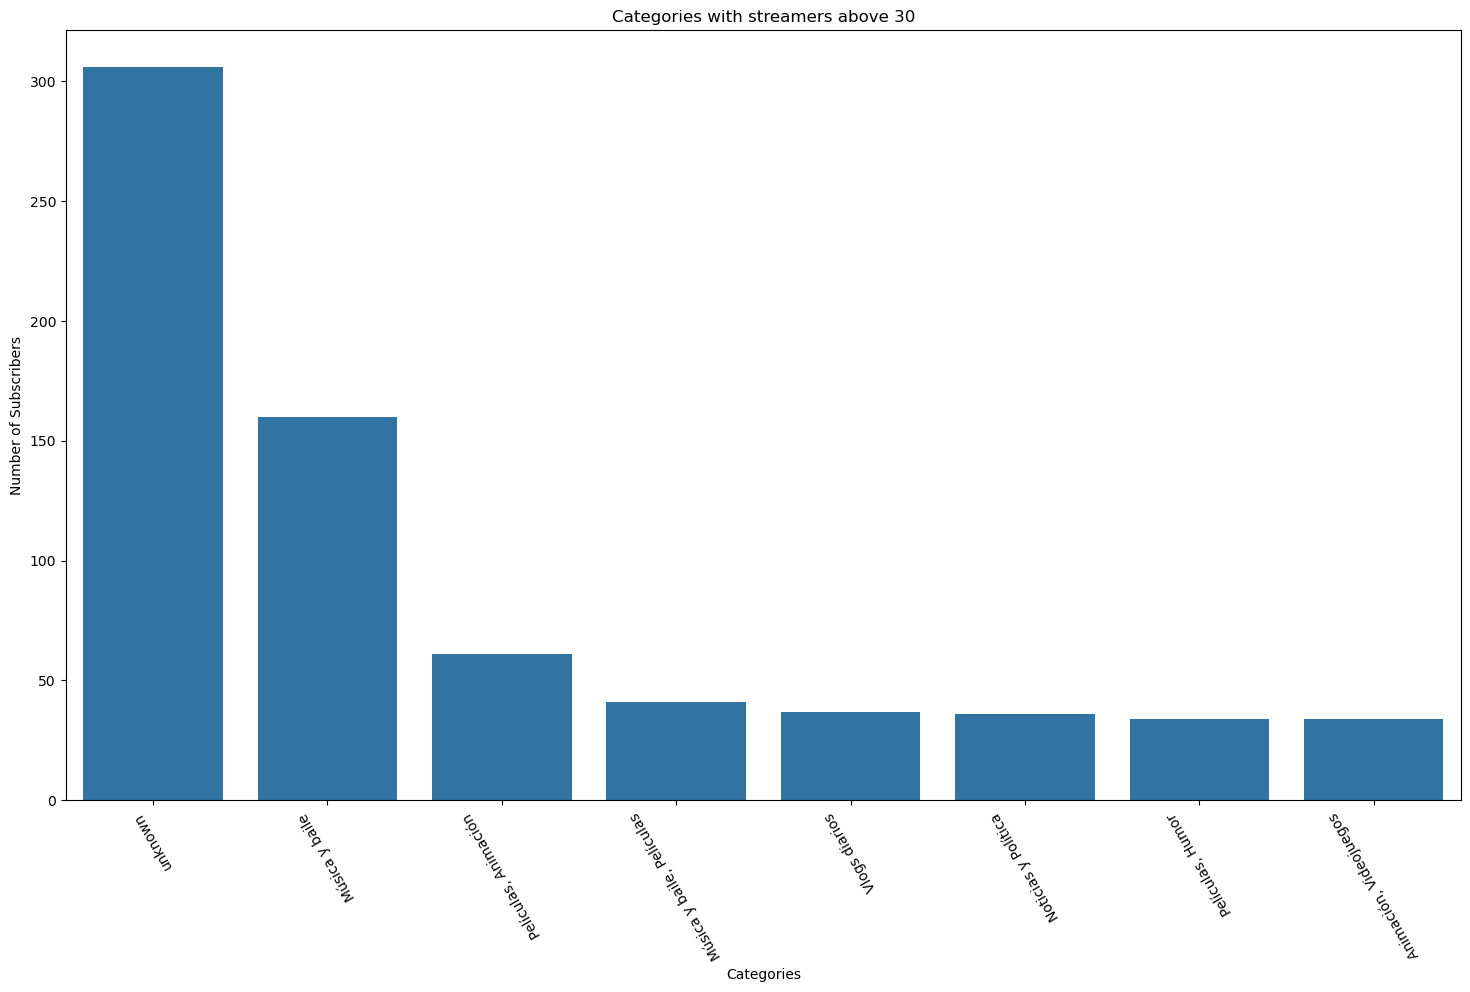

In [113]:
plt.figure(figsize = (18,10))
sns.barplot(x=categories_with_streamers_above_30.index,y = categories_with_streamers_above_30.values) # Barplot
plt.title("Categories with streamers above 30")
plt.xlabel("Categories")
plt.ylabel("Number of Subscribers")
plt.xticks(rotation = 120) # Rotation of the index
plt.show()

In [121]:
performance_metrics = ["Subscribers", "Visits", "Likes", "Comments"]
exceptional_categories_by_metric = {metric: [] for metric in performance_metrics}

for metric in performance_metrics:
    z_scores = (data[metric] - data[metric].mean()) / data[metric].std()
    exceptional_categories = data[z_scores.abs() > 2]["Categories"].unique()
    exceptional_categories_by_metric[metric] = exceptional_categories

# Find exceptional categories among multiple metrics
exceptional_categories_across_metric = set()
for metric, categories in exceptional_categories_by_metric.items():
    exceptional_categories_across_metric.update(categories)

print(f'Categories exceptional across metrics: {", ".join(exceptional_categories_across_metric)}')

Categories exceptional across metrics: Películas, Videojuegos, Comida y bebida, Animación, Juguetes, Películas, Animación, Música y baile, Animación, Humor, Videojuegos, Humor, unknown, Noticias y Política, Juguetes, Deportes, Vlogs diarios, Educación, Videojuegos, Películas, Humor, Animación, Videojuegos


# 6. Brands and Collaboration

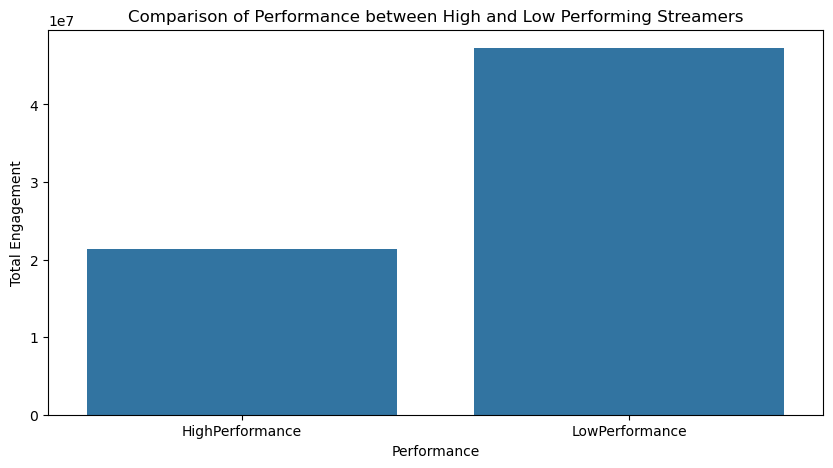

In [128]:
# Define thresholds for high and low performance based on quartiles
high_subscriber = data["Subscribers"].quantile(0.75, interpolation = "nearest")
high_likes = data["Likes"].quantile(0.75, interpolation = "nearest")
high_comments = data["Comments"].quantile(0.75, interpolation = "nearest")

low_subscriber = data["Subscribers"].quantile(0.25, interpolation = "nearest")
low_likes = data["Likes"].quantile(0.25, interpolation = "nearest")
low_comments = data["Comments"].quantile(0.25, interpolation = "nearest")

# High Performance and Low Performance
data["HighPerformance"] = ((data["Subscribers"] >= high_subscriber) & 
                           (data["Likes"] >= high_likes) & 
                           (data["Comments"] >= high_comments))
data["LowPerformance"] = ((data["Subscribers"] >= low_subscriber) & 
                           (data["Likes"] >= low_likes) & 
                           (data["Comments"] >= low_comments))
# Engagement depending on likes and comments
data["Engagement"] = data["Likes"] + data["Comments"]
high_performance = data[data["HighPerformance"]]["Engagement"].sum()
low_performance = data[data["LowPerformance"]]["Engagement"].sum()

#barplot of High and Low Performances 
plt.figure(figsize = (10,5))
sns.barplot(x = ["HighPerformance", "LowPerformance"], y = [high_performance, low_performance])
plt.title("Comparison of Performance between High and Low Performing Streamers")
plt.xlabel("Performance")
plt.ylabel("Total Engagement")
plt.show()

In [130]:
data.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,HighPerformance,LowPerformance,Engagement
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,False,True,2778.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,True,True,5318500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,False,False,24700.0
3,4,SETIndia,unknown,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,False,False,175.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,False,False,12400.0


In [134]:
# Removing Links column from the dataset
data.drop(columns=["Links"], inplace=True)
data.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,HighPerformance,LowPerformance,Engagement
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,False,True,2778.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,True,True,5318500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,False,False,24700.0
3,4,SETIndia,unknown,162600000.0,India,15600.0,166.0,9.0,False,False,175.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,False,False,12400.0


# 7. Benchmarking

In [137]:
# Metrics above their average
data["Above_Avg_Subscribers"] = data["Subscribers"] > avg_subscribers
data["Above_Avg_Visits"] = data["Visits"] > avg_visits
data["Above_Avg_Likes"] = data["Likes"] > avg_likes
data["Above_Avg_Comments"] = data["Comments"] > avg_comments

# Top performing streamers in terms of metrics above average
top_performing_streamers = data[data["Above_Avg_Subscribers"] &
                                data["Above_Avg_Visits"] &
                                data["Above_Avg_Likes"] &
                                data["Above_Avg_Comments"]]
print("Top-performing Creators: The identification of the top performers according to subscribers, visits, likes and comments.")

#Output
top_performing_streamers

Top-performing Creators: The identification of the top performers according to subscribers, visits, likes and comments.


,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,HighPerformance,LowPerformance,Engagement,Above_Avg_Subscribers,Above_Avg_Visits,Above_Avg_Likes,Above_Avg_Comments
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,True,True,5318500.0,True,True,True,True
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,True,True,202200.0,True,True,True,True
26,27,dudeperfect,Videojuegos,59700000.0,Estados Unidos,5300000.0,156500.0,4200.0,True,True,160700.0,True,True,True,True
34,35,TaylorSwift,Música y baile,54100000.0,Estados Unidos,4300000.0,300400.0,15000.0,True,True,315400.0,True,True,True,True
39,40,JuegaGerman,"Películas, Animación",48600000.0,México,2000000.0,117100.0,3000.0,True,True,120100.0,True,True,True,True
43,44,A4a4a4a4,"Animación, Humor",47300000.0,Rusia,9700000.0,330400.0,22000.0,True,True,352400.0,True,True,True,True
58,59,Mikecrack,"Películas, Animación",43400000.0,México,2200000.0,183400.0,1800.0,True,True,185200.0,True,True,True,True
62,63,KimberlyLoaiza,Música y baile,42100000.0,México,5300000.0,271300.0,16000.0,True,True,287300.0,True,True,True,True
64,65,luisitocomunica,unknown,41100000.0,México,2500000.0,128900.0,1800.0,True,True,130700.0,True,True,True,True
70,71,JessNoLimit,"Películas, Animación",39600000.0,Indonesia,1300000.0,73500.0,1600.0,True,True,75100.0,True,True,True,True


# 8. Content Recommendations